In [1]:
import pandas as pd
import json
import joblib


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("animal_disease_dataset.csv")

# Show the first few rows
print("Preview:\n", df.head(), "\n")

# Check for missing values
print("Missing values:\n", df.isnull().sum(), "\n")

Preview:
     Animal  Age  Temperature         Symptom 1         Symptom 2  \
0      cow    3        103.1        depression    painless lumps   
1  buffalo   13        104.5    painless lumps  loss of appetite   
2    sheep    1        100.5        depression    painless lumps   
3      cow   14        100.3  loss of appetite  swelling in limb   
4    sheep    2        103.6    painless lumps  loss of appetite   

          Symptom 3      Disease  
0  loss of appetite    pneumonia  
1        depression  lumpy virus  
2  loss of appetite  lumpy virus  
3   crackling sound     blackleg  
4        depression    pneumonia   

Missing values:
 Age                                  0
Temperature                          0
Animal_buffalo                       0
Animal_cow                           0
Animal_goat                          0
                                    ..
Symptom 3_swelling in extremities    0
Symptom 3_swelling in limb           0
Symptom 3_swelling in muscle         0
S

In [ ]:
# Count unique entries per category
print("Animal counts:\n", df['Animal'].value_counts(), "\n")
print("Symptom 1 counts:\n", df['Symptom 1'].value_counts(), "\n")
print("Symptom 2 counts:\n", df['Symptom 2'].value_counts(), "\n")
print("Symptom 3 counts:\n", df['Symptom 3'].value_counts(), "\n")
print("Disease counts:\n", df['Disease'].value_counts(), "\n")


Disease counts:
 Disease
anthrax           9842
blackleg          9713
foot and mouth    9701
pneumonia         7330
lumpy virus       7192
Name: count, dtype: int64 



In [11]:
categorical_cols = ['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Show the resulting DataFrame
print("One-hot encoded DataFrame:\n", df_encoded)

One-hot encoded DataFrame:
        Age  Temperature         Disease  Animal_buffalo  Animal_cow  \
0        3        103.1       pneumonia           False        True   
1       13        104.5     lumpy virus            True       False   
2        1        100.5     lumpy virus           False       False   
3       14        100.3        blackleg           False        True   
4        2        103.6       pneumonia           False       False   
...    ...          ...             ...             ...         ...   
43773    9        102.2        blackleg           False       False   
43774    3        101.8  foot and mouth            True       False   
43775   15        104.1         anthrax            True       False   
43776    9        104.9        blackleg           False        True   
43777    4        103.5  foot and mouth            True       False   

       Animal_goat  Animal_sheep  Symptom 1_blisters on gums  \
0            False         False                       

In [34]:
mapping = {
    "anthrax": 0,
    "blackleg": 1,
    "foot and mouth": 2,
    "pneumonia": 3,
    "lumpy virus": 4,
}

df_encoded['Disease'] = df_encoded['Disease'].map(mapping)
df_encoded.drop(columns=['Disease'], inplace=True)



In [35]:
df_encoded.to_csv("feature_engineered_dataset.csv")


In [29]:
df_encoded.info

<bound method DataFrame.info of        Age  Temperature  Disease  Animal_buffalo  Animal_cow  Animal_goat  \
0        3        103.1      NaN           False        True        False   
1       13        104.5      NaN            True       False        False   
2        1        100.5      NaN           False       False        False   
3       14        100.3      NaN           False        True        False   
4        2        103.6      NaN           False       False        False   
...    ...          ...      ...             ...         ...          ...   
43773    9        102.2      NaN           False       False         True   
43774    3        101.8      NaN            True       False        False   
43775   15        104.1      NaN            True       False        False   
43776    9        104.9      NaN           False        True        False   
43777    4        103.5      NaN            True       False        False   

       Animal_sheep  Symptom 1_blisters on 

In [36]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming df_encoded is the DataFrame with one-hot encoded features
X = df_encoded.drop(columns=['Disease_label'])  # Drop target column for features
y = df_encoded['Disease_label']  # Target column

# Normalize data (importa   nt for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into 70% training and 30% validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer with ReLU activation
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer with ReLU activation
    Dropout(0.2),  # Dropout layer
    Dense(5, activation='softmax')  # Output layer with Softmax for classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")


2025-05-06 19:11:11.525050: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 19:11:11.529412: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-06 19:11:11.544223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746551471.565793    9331 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746551471.572305    9331 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746551471.587068    9331 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,693 (73.02 KB)

 Trainable params: 18,693 (73.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7558 - loss: 0.4916 - val_accuracy: 0.8354 - val_loss: 0.2290
Epoch 2/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8363 - loss: 0.2334 - val_accuracy: 0.8356 - val_loss: 0.2279
Epoch 3/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8324 - loss: 0.2337 - val_accuracy: 0.8358 - val_loss: 0.2279
Epoch 4/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8267 - loss: 0.2365 - val_accuracy: 0.8337 - val_loss: 0.2283
Epoch 5/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8340 - loss: 0.2321 - val_accuracy: 0.8371 - val_loss: 0.2287
Epoch 6/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8334 - loss: 0.2341 - val_accuracy: 0.8357 - val_loss: 0.2292
Epoch 7/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8328 - loss: 0.2325 - val_accuracy: 0.8361 - val_loss: 0.2279
Epoch 8/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8344 - loss: 0.2332 - val_accuracy: 0.

In [37]:
loss, accuracy = model.evaluate(X_val, y_val)

# Output the validation accuracy as a percentage
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8307 - loss: 0.2305
Validation Accuracy: 83.49%


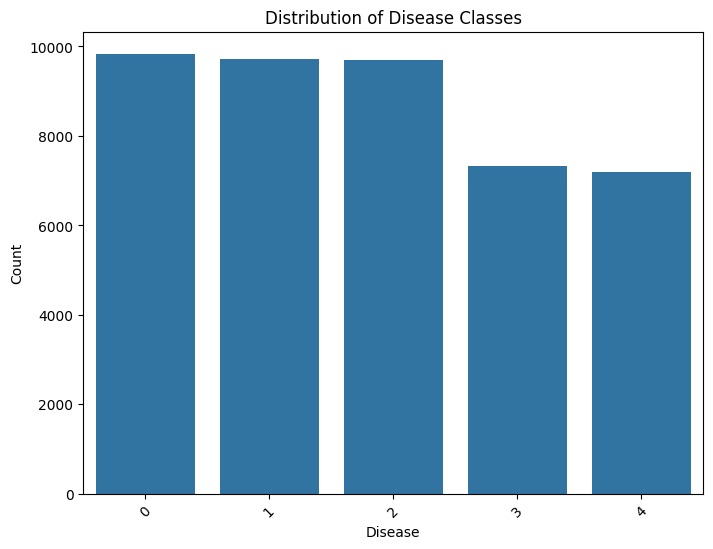

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the Disease classes in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Disease_label', data=df_encoded)
plt.title('Distribution of Disease Classes')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


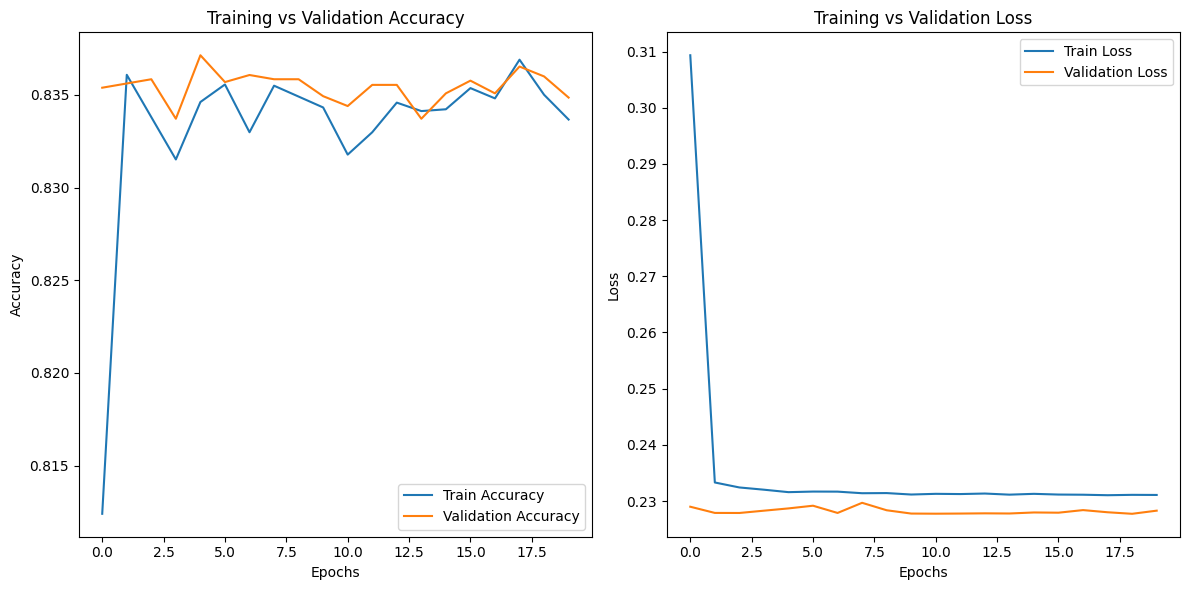

In [42]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


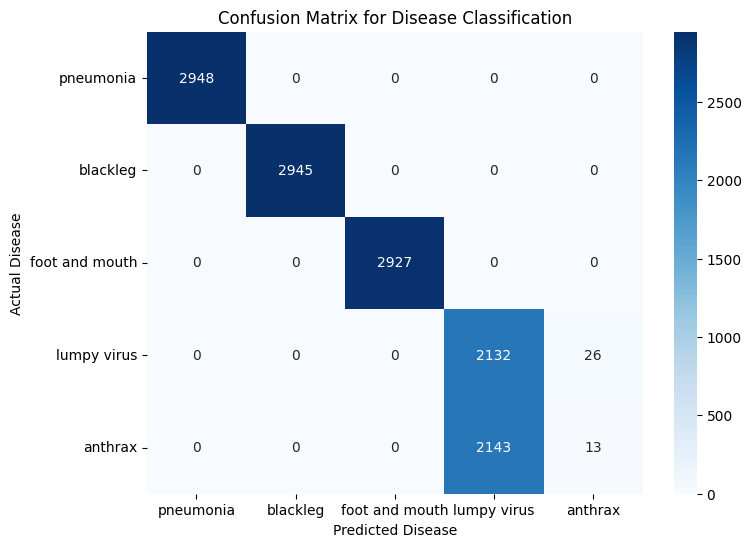

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predict on the validation set
y_pred = model.predict(X_val)

# Get the predicted classes (convert the probabilities to class labels)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Disease labels (0 to 4)
disease_labels = ['pneumonia', 'blackleg', 'foot in mouth', 'lumpy virus', 'anthrax']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=disease_labels, yticklabels=disease_labels)
plt.title('Confusion Matrix for Disease Classification')
plt.xlabel('Predicted Disease')
plt.ylabel('Actual Disease')
plt.show()
